# Explore additional statistics related to the forecast variable

## Introduction

In this notebook, I continue explore the forecast variable of weekly cases of dengue fever across my two samples--one from San Juan, Puerto Rico and the other from Iquitos, Peru.

Here, I focus on the following statistical concepts.  Specifically, I look at:

* autocorrelation and
* stationarity

I collect my commentary into a summary at the end of the notebook.

## Set up

In [1]:
# Eliminate some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import key libraries
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
# Set some Seaborn defaults
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('muted')

In [4]:
import my_func

## Load data

In [5]:
# Unpickle the dataframe 
forc_sj = pd.read_pickle('../sb_cap2_nb-99_data/clean_train_forecast-variable_sj.pickle')
forc_iq = pd.read_pickle('../sb_cap2_nb-99_data/clean_train_forecast-variable_iq.pickle')

## Examine autocorrelation  -  San Juan

In [6]:
def graph_acf(df, city):
    """Graph ACF"""
 
    # Drop columns that are not needed
    df_ac = df.drop(['year', 'month', 'weekofyear'], axis=1)
    
    # Graph acf
    g = plot_acf(df_ac, lags=52)
    g = plt.xlabel('Lags')
    g = plt.ylabel('Correlation')
    g = plt.title('Autocorrelation of weekly cases with 95% confidence intervals in {}'.format(city))
    g = plt.box(on=None)
    g = plt.show()    

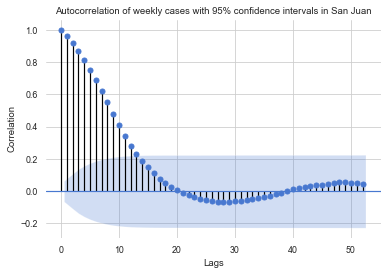

In [7]:
graph_acf(forc_sj, 'San Juan')

In [8]:
def graph_pacf(df, city):
    """Graph PACF"""
    
    # Drop columns that are not needed
    df_ac = df.drop(['year', 'month', 'weekofyear'], axis=1)
    
    # Graph pacf
    g = plot_pacf(df_ac, lags=52)
    g = plt.xlabel('Lags')
    g = plt.ylabel('Correlation')
    g = plt.title('Partial autocorrelation of weekly cases with 95% confidence intervals in {}'.format(city))
    g = plt.box(on=None)
    g = plt.show()

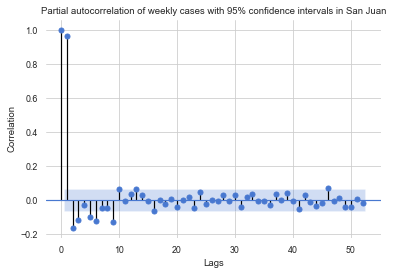

In [9]:
graph_pacf(forc_sj, 'San Juan')

In [10]:
def graph_lag_plots(df, high_pacf, city):
    """"# Graph lag plots given those lags at high pacf"""
    
    # Drop columns that are not needed
    df_ac = df.drop(['year', 'month', 'weekofyear'], axis=1)
    
    # Print title
    print('Lag plots at those lags with highest partial autocorrelation in {}'.format(city)) 

    # Graph lag plots
    for i in high_pacf:
        g = lag_plot(df_ac['total_cases'], lag=i, c='blue', alpha=0.2, s=5)
        g = plt.box(on=None)
        g = plt.show()

Lag plots at those lags with highest partial autocorrelation in San Juan


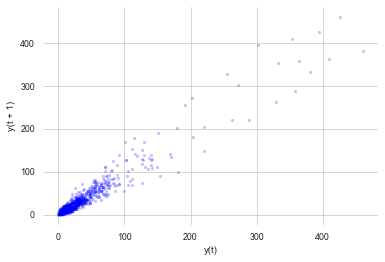

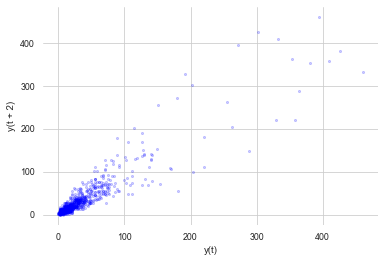

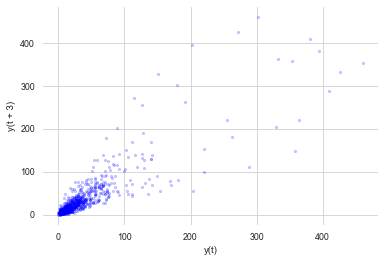

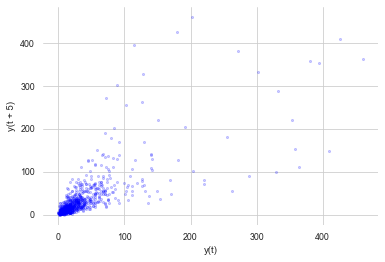

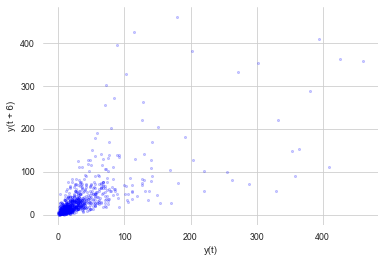

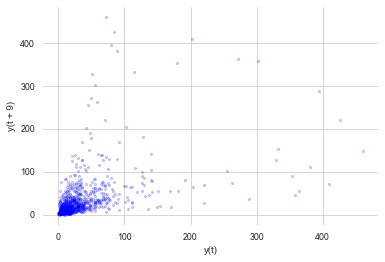

In [11]:
graph_lag_plots(forc_sj, [1, 2, 3, 5, 6, 9], 'San Juan')

## Examine stationary - San Juan

In [12]:
my_func.stationarity_test_via_simple_calcs(forc_sj, 'San Juan')

Here's a quick test for stationarity.
Most likley, a time series is NOT stationary if . . . 

. . . the mean of each half of the data isn't roughly the same.
    Are the means of 48.26495726495727 and 20.096153846153847 roughly equal?
    No, for the San Juan data, the second half is not within 5% of first half.

. . . if the variance of each half of the data isn't roughly the same.
    Are the variances of 4333.398598070972 and 554.7551886015482 roughly equal?
    No,  for the San Juan data, the second half is not within 5% of first half.


('mean_no', 'var_no')

Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in San Juan


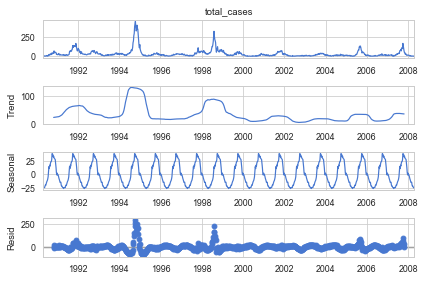

In [13]:
my_func.stationarity_test_via_seasonal_decompose(forc_sj, 'San Juan')

In [14]:
my_func.stationarity_test_via_adf(forc_sj, 'San Juan')

Here are the resutls of testing using ADF in San Juan

ADF test stat: 	            -3.59574
P value: 	             0.00584
Lags used: 	            52.00000
Observations: 	           883.00000
    1%: 	            -3.43778
    5%: 	            -2.86482
    10%: 	            -2.56852

Applying the test results
My null is:  there is a unit root, which means not stationary
At significance level of 5%, my thinking is:
	 P-value is less than critical value.
	 Reject null.  Accept alternative.
	 No satistically signifcant unit root
	 That is, this time series is stationary


In [15]:
my_func.stationarity_test_via_kpss(forc_sj, 'San Juan')

Here are the restuls of testing using KPSS in San Juan

KPSS stat: 	             0.32488
P value: 	             0.10000
Lags used: 	            52.00000
    10%: 	             0.34700
    5%: 	             0.46300
    2.5%: 	             0.57400
    1%: 	             0.73900

Applying the test results
My null is:  there is no unit root, which means stationary
At significance level of 5%, my thinking is:
	 P-value is greater than or equal to critical value
	 Do not reject null.  Do not accept alternative
	 Cannot conclude there is no stat. sig. unit root.
	 That is, this time series is likely stationary.


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Explore cases in Iquitos, Peru

### Examine autocorrelation of weekly cases  -  Iquitos

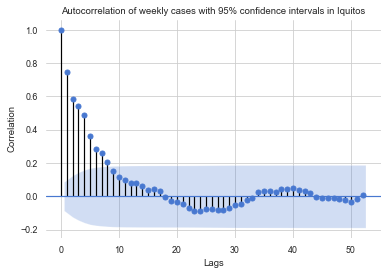

In [16]:
# Graph acf
graph_acf(forc_iq, 'Iquitos')

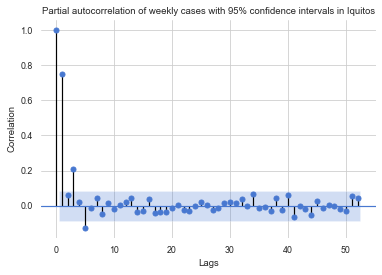

In [17]:
# Graph pacf
graph_pacf(forc_iq, 'Iquitos')

Lag plots at those lags with highest partial autocorrelation in Iquitos


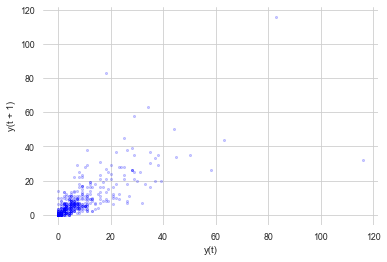

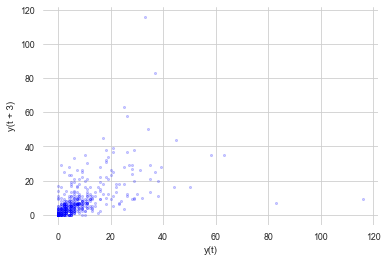

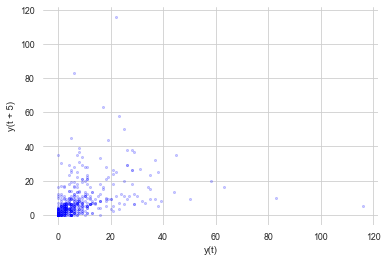

In [18]:
# Graph lag plots at high pacf
graph_lag_plots(forc_iq, [1, 3, 5], 'Iquitos')

## Examine stationarity - Iquitos

In [19]:
my_func.stationarity_test_via_simple_calcs(forc_iq, 'Iquitos')

Here's a quick test for stationarity.
Most likley, a time series is NOT stationary if . . . 

. . . the mean of each half of the data isn't roughly the same.
    Are the means of 6.4423076923076925 and 8.688461538461539 roughly equal?
    No, for the Iquitos data, the second half is not within 5% of first half.

. . . if the variance of each half of the data isn't roughly the same.
    Are the variances of 123.84607959607963 and 105.86009801009804 roughly equal?
    No,  for the Iquitos data, the second half is not within 5% of first half.


('mean_no', 'var_no')

Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in Iquitos


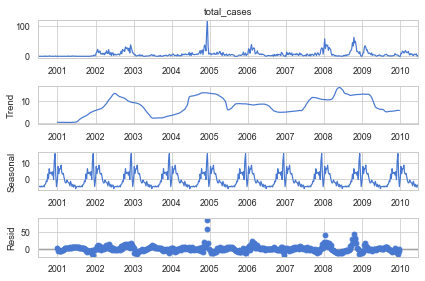

In [20]:
my_func.stationarity_test_via_seasonal_decompose(forc_iq, 'Iquitos')

In [21]:
my_func.stationarity_test_via_adf(forc_iq, 'Iquitos')

Here are the resutls of testing using ADF in Iquitos

ADF test stat: 	            -3.16162
P value: 	             0.02232
Lags used: 	            52.00000
Observations: 	           467.00000
    1%: 	            -3.44443
    5%: 	            -2.86775
    10%: 	            -2.57008

Applying the test results
My null is:  there is a unit root, which means not stationary
At significance level of 5%, my thinking is:
	 P-value is less than critical value.
	 Reject null.  Accept alternative.
	 No satistically signifcant unit root
	 That is, this time series is stationary


In [22]:
my_func.stationarity_test_via_kpss(forc_iq, 'Iquitos')

Here are the restuls of testing using KPSS in Iquitos

KPSS stat: 	             0.26543
P value: 	             0.10000
Lags used: 	            52.00000
    10%: 	             0.34700
    5%: 	             0.46300
    2.5%: 	             0.57400
    1%: 	             0.73900

Applying the test results
My null is:  there is no unit root, which means stationary
At significance level of 5%, my thinking is:
	 P-value is greater than or equal to critical value
	 Do not reject null.  Do not accept alternative
	 Cannot conclude there is no stat. sig. unit root.
	 That is, this time series is likely stationary.


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## Commentary

Here are my takeaways. 

### San Juan, Puerto Rico

**Autocorrelation via ACF, PACF and Lag Plots in San Juan**:  

* I visualize the series using statsmodels's auto-correlation function (ACF), its partial auto-correlation function (PACF) and Pandas' lag plot function.  

* The ACF graph shows a gradual decline in correlation as lags increase.  This validates the present of a slowly declining trend.  Plus, the change from a positive correlation to a negative one at about 20 weeks might be consistent with our seasonable pattern.

* The PACF highlights the strongest autocorrelation is with week 1.  Also, there might be some weak negative correlation with weeks 2, 3, 5, 6, and 9.

* A look at lag plots for those periods shows, to my eye, that the meaningful correlation is with weeks 2 and 3, but there's likely not much meaningful correlation with those later weeks.

**Stationarity**

* Many time-series models, including ARIMA-type models, require stationarity.  The properties of a stationary time series do not depend on the time at which the series is observed.  That is, the series has neither trend nor seasonality.  And for a stationary time series, summary statistics are generally consistent over time.  

* A simple (but by no means definitive) method to inspect for stationarity is to examine whether basic summary statistics across the time-series are consistent.  For San Juan, the mean of the first half of the series is about two times larger than the mean of the second half, and the variance is about ten times larger.  These large differences are clues my series is not stationary.

* Another simple (but not definitive) method is to visually inspect for trend and seasonality.  As mentioned above, a seasonal decomposition show a slightly downward trend and strong seasonality.  This is another clue as to lack of seasonality.

* Statistical tests provide additional evidence of stationarity.  

* First, I use an Augmented Dickey-Fuller test (ADF) as a unit root test.  I define the null (i.e, my series can be represented by a unit root and is not stationary) and my alternative (i.e., my time series does not have a unit root and is stationary).  I compare the p-value of my test statistic to that at a solid level of confidence (i.e., 5%).  If my test statistic is less than my critical value, then I reject the null and accept the alternative (i.e., my series is stationary).

* My test's p-value is around .6%.  This is well below the 5% alpha, which would indicate to reject the null and conclude that the series is stationary and it's statistically significant.

* Second, I try another unit root test--KPSS.  In this test, the null is the opposite of ADF--that the series lacks a unit root and is stationary.  My calculated p-value of 10% is more than the significance level of 5%, which means I can't reject the null and can't conclude that the series is not stationary.

* In this cases, both of my statistical tests are pointing towards stationarity.  

* Nevertheless, I conclude that San Juan data is not stationary.  This is mainly due to the strong seasonality I see in the visual decomposition.

### Iquitos, Peru



**ACF, PACF and Lag Plots**:

* Iquitos' ACF is roughly similar to that of San Juan, although Iquitos has two patches of negative correlation.

* Iquitos' PACF is likewise roughly similar to that of San Juan, although Iquitos shows positive correlation at weeks 1 and 2 and negative correlation at week 5.

* Iquitos' lag plots at weeks 1, 3, and 5, however, don't appear too strongly correlated.

**Stationarity**

* The Iquitos time series is not stationary, most likely.

* Comparing summary statistics points to a lack of stationarity.  The first half of the time series has a lower mean and higher variance than the second half.

* Inspecting the series' decomposition highlights a strong seasonal patterns.

* Interpreting the ADF test means I eject the null and accept the alternative--the time series is stationary.  That is, my calculated p-value at about 2% is less than 5% significance level.

* Interpreting the KPSS test means I fail to reject the null and cannot accept the alternative, which in this case points me towards stationarity.  That is, my calculated p-value at about 10% is more than my 5% significance level.

* Like I do with San Juan, I conclude that the Iquitos time series in not stationary.  This is mainly due to the strong seasonality I see in the seasonal decomposition.